In [ ]:
##Final Project

Problem Statement#

1.Dataset is ‘Physio Net EEG Motor Movement/Imagery Dataset' with link as
https://physionet.org/content/eegmmidb/1.0.0/

2.The chosen ‘Physio Net EEG Motor Movement/Imagery Dataset’ consists of over 1500 one- and two-minute EEG recordings, obtained from 109 volunteers. Subjects performed different motor/imagery tasks while 64-channel EEGs were recorded using the BCI2000 system.

3.Each record represent an EEG recording at different time step.

4.Each feature represent a different EEG channel measured by placing different electrodes on the scalp of the brain.

5.The objective of my project is to classify the motor movement (label=left fist movement or label=right fist movement ) by considering 2 subjects from a pool of 109 subjects in the data.

6.The evaluation metrics chosen are the accuracy, f1 score, precision, recall and the confusion matrix with the heatmap of the same.


In [ ]:
##importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
##since the data (Brain-Computer-Interface Motor Imagery ) is very large large, need to install the MNE library for importing th data
!pip install mne

     |████████████████████████████████| 7.4 MB 3.1 MB/s 


In [ ]:

##importing mne library for reading the EDF (European Data Format) file
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne import Epochs, pick_types, events_from_annotations

In [ ]:
## reading the data file for Subject 1 performing the task of motor movement (opening & closing of left or right fist )
event_id=dict(left=0,right=1)
subject=1
runs=[3]
raw_fnames=eegbci.load_data(subject,runs)
raw=concatenate_raws([read_raw_edf(f,preload=True) for f in raw_fnames])

Using default location ~/mne_data for EEGBCI...
Creating ~/mne_data


Do you want to set the path:
    /root/mne_data
as the default EEGBCI dataset path in the mne-python config [y]/n? y
Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


In [ ]:
##showing the information of the downloaded file
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>

In [ ]:
##This EEG recording is between 0-80 Hz, but we need to classify the motor movements which according to many literatures lie in the  frequency range 7-30Hz.
#So, we need to bandpass filter the eeg data.
##bandpass filtering
raw_filter=raw.filter(7,30,fir_design='firwin',skip_by_annotation='edge')
events,_=events_from_annotations(raw_filter,event_id=dict(T0=0,T1=1,T2=2))
##here, T0 is the rest state in the eeg data, T1 = movement of the left fist while T2 = movement of the right fist
# eeg data information after bandpass filtering
raw_filter.info


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 sec)

Used Annotations descriptions: ['T0', 'T1', 'T2']


<Info | 7 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 7.0 Hz
 lowpass: 30.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>

Using matplotlib as 2D backend.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


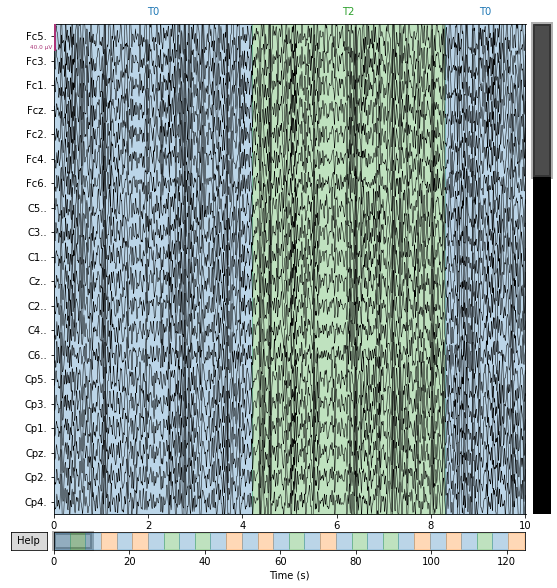

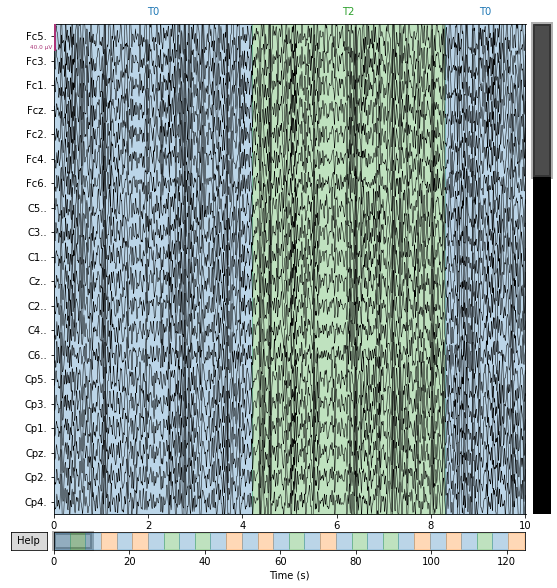

In [ ]:
##plotting the eeg data using the Matplotlib library
raw_filter.plot()

In [ ]:
##Now, converting our EEG data into Pandas Data Frame
header = ','.join(raw_filter.ch_names)
np.savetxt('S01.csv', raw_filter.get_data().T, delimiter=',', header=header)
df1=pd.read_csv('S01.csv')
df1


# Fc5.          Fc3.  ...          O2..          Iz..
0      6.776264e-21  6.776264e-21  ...  2.710505e-20 -1.355253e-20
1      9.950471e-06  5.926574e-06  ... -9.901765e-06  1.136744e-07
2      8.671146e-06  1.738057e-06  ... -1.148404e-05  6.687840e-06
3     -1.483135e-06 -9.158026e-06  ... -6.600356e-06  1.585866e-05
4     -7.746439e-06 -1.370894e-05  ... -4.301756e-06  1.786006e-05
...             ...           ...  ...           ...           ...
19995  1.276246e-07  1.272336e-07  ...  8.995274e-08 -2.727791e-07
19996  8.156045e-08  8.353251e-08  ...  4.316497e-08 -2.316985e-07
19997  4.674940e-08  4.905183e-08  ...  1.506948e-08 -1.697338e-07
19998  2.080745e-08  2.250541e-08  ...  2.521268e-09 -9.048123e-08
19999 -1.694066e-21  6.776264e-21  ... -5.082198e-21  2.541099e-21

[20000 rows x 64 columns]

In [ ]:
##Renaming the columns of the Data Frame; removing '#' and '.'.
df=df1.rename(columns=lambda x:x.strip('.'))
df=df.rename(columns=lambda x:x.strip('#'))
df

Fc5           Fc3  ...            O2            Iz
0      6.776264e-21  6.776264e-21  ...  2.710505e-20 -1.355253e-20
1      9.950471e-06  5.926574e-06  ... -9.901765e-06  1.136744e-07
2      8.671146e-06  1.738057e-06  ... -1.148404e-05  6.687840e-06
3     -1.483135e-06 -9.158026e-06  ... -6.600356e-06  1.585866e-05
4     -7.746439e-06 -1.370894e-05  ... -4.301756e-06  1.786006e-05
...             ...           ...  ...           ...           ...
19995  1.276246e-07  1.272336e-07  ...  8.995274e-08 -2.727791e-07
19996  8.156045e-08  8.353251e-08  ...  4.316497e-08 -2.316985e-07
19997  4.674940e-08  4.905183e-08  ...  1.506948e-08 -1.697338e-07
19998  2.080745e-08  2.250541e-08  ...  2.521268e-09 -9.048123e-08
19999 -1.694066e-21  6.776264e-21  ... -5.082198e-21  2.541099e-21

[20000 rows x 64 columns]

In [ ]:
##Reading the label file containg the 'left hand movement' and 'right hand movement' as '1' and '0' classes excluding the rest state.
data=pd.concat([df.iloc[672:1327], df.iloc[2000:2655],df.iloc[3328:3983],df.iloc[4656:5311],df.iloc[5984:6639],df.iloc[7312:7967],df.iloc[8640:9295],df.iloc[9968:10623],df.iloc[11296:11951],df.iloc[12624:13279],df.iloc[13952:14607],df.iloc[15280:15935],df.iloc[16608:17263],df.iloc[17936:18591],df.iloc[19264:20000]],ignore_index=True)
l=[]
for i in range(672,1327):
    l.append(1)
for i in range(2000,2655):
    l.append(0)
for i in range(3328,3983):
    l.append(0)
for i in range(4656,5311):
    l.append(1)
for i in range(5984,6639):
    l.append(1)
for i in range(7312,7967):
    l.append(0)
for i in range(8640,9295):
    l.append(0)
for i in range(9968,10623):
    l.append(1)
for i in range(11296,11951):
    l.append(0)
for i in range(12624,13279):
    l.append(1)
for i in range(13952,14607):
    l.append(1)
for i in range(15280,15935):
    l.append(0)
for i in range(16608,17263):
    l.append(0)
for i in range(17936,18591):
    l.append(1)
for i in range(19264,20000):
    l.append(0)

print(len(l))

l_y={'label':l}
df_y=pd.DataFrame(l_y)
df_y


9906


label
0         1
1         1
2         1
3         1
4         1
...     ...
9901      0
9902      0
9903      0
9904      0
9905      0

[9906 rows x 1 columns]

In [ ]:
##Concatenating our label data with the eeg data and removing the rest state which we are not classifying and thus our data dimensions will be 9906*65
data_y=pd.concat([data,df_y],axis=1)
data_y

Fc5           Fc3  ...            Iz  label
0     8.941842e-06  8.677721e-06  ...  1.772176e-06      1
1    -4.667229e-06 -1.394407e-05  ...  3.654141e-06      1
2    -1.325836e-05 -2.323492e-05  ...  1.059262e-05      1
3    -1.090619e-05 -1.463877e-05  ...  1.161910e-05      1
4    -2.903989e-06 -1.705092e-06  ...  2.212241e-06      1
...            ...           ...  ...           ...    ...
9901  1.276246e-07  1.272336e-07  ... -2.727791e-07      0
9902  8.156045e-08  8.353251e-08  ... -2.316985e-07      0
9903  4.674940e-08  4.905183e-08  ... -1.697338e-07      0
9904  2.080745e-08  2.250541e-08  ... -9.048123e-08      0
9905 -1.694066e-21  6.776264e-21  ...  2.541099e-21      0

[9906 rows x 65 columns]

In [ ]:
##looking at the data types of the features: EEG channels
df.dtypes

 Fc5    float64
Fc3     float64
Fc1     float64
Fcz     float64
Fc2     float64
         ...   
Po8     float64
O1      float64
Oz      float64
O2      float64
Iz      float64
Length: 64, dtype: object

In [ ]:
##looking at the data types of the label
print(df_y.dtypes)
print(df_y)

label    int64
dtype: object
      label
0         1
1         1
2         1
3         1
4         1
...     ...
9901      0
9902      0
9903      0
9904      0
9905      0

[9906 rows x 1 columns]


In [ ]:
## checking for null values in the data
data_y.isnull().values.any()

False

Checking for NA values in the data

In [ ]:
##checking for NA values in the data
data_y.isna().values.any()

False

Statistics/ Summary of the data

In [ ]:
data_y.iloc[:,0:-1].describe()

Fc5           Fc3  ...            O2            Iz
count  9.906000e+03  9.906000e+03  ...  9.906000e+03  9.906000e+03
mean  -2.127149e-08 -3.570220e-08  ... -2.334076e-08 -2.750496e-08
std    2.046912e-05  2.121139e-05  ...  2.841470e-05  2.875576e-05
min   -7.860842e-05 -8.943120e-05  ... -1.322938e-04 -1.395029e-04
25%   -1.261104e-05 -1.311446e-05  ... -1.741372e-05 -1.670660e-05
50%   -2.438700e-07 -2.191528e-07  ... -3.897516e-07 -5.980788e-07
75%    1.183636e-05  1.243316e-05  ...  1.648063e-05  1.516606e-05
max    1.029184e-04  1.022490e-04  ...  1.480830e-04  1.589186e-04

[8 rows x 64 columns]

Checking if the data is balanced

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


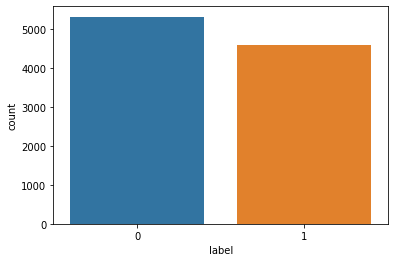

In [ ]:
sns.countplot(df_y['label'])

Counting the number of values in each class

In [ ]:
class_count0,class_count1=df_y['label'].value_counts()
print("Class 0:", class_count0,  "Class 1:",  class_count1)

Class 0: 5321 Class 1: 4585


Visualizing the data

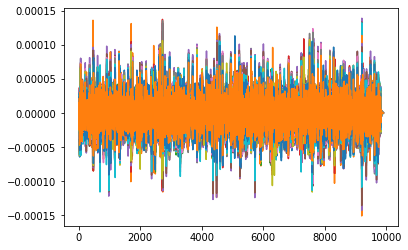

In [ ]:
plt.plot(data.iloc[:,0:32])

In [ ]:
##Pairplot

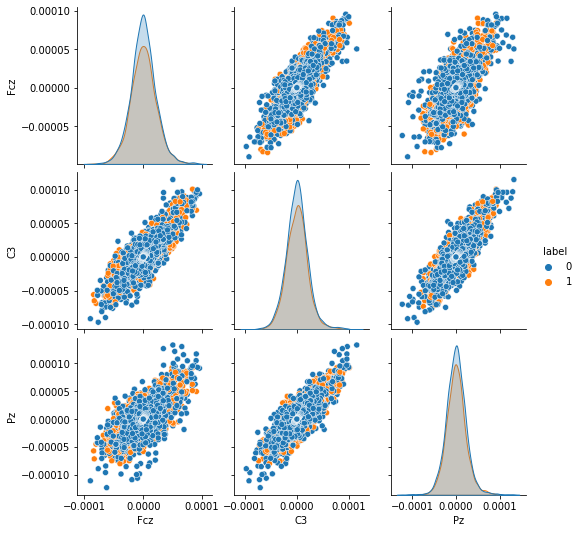

In [ ]:
sns.pairplot(data_y,x_vars=["Fcz","C3","Pz"],y_vars=["Fcz","C3","Pz"],hue="label")

Visualizing Correlation between features

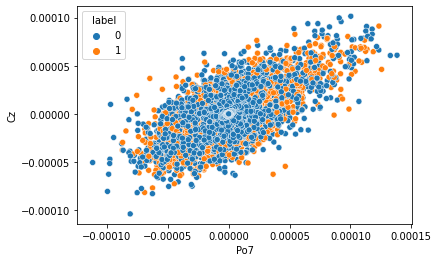

In [ ]:
##plotting for between features 'Po7' & 'Cz'
sns.scatterplot(data=data_y, x="Po7",y="Cz",hue="label")

Correlation Heatmap

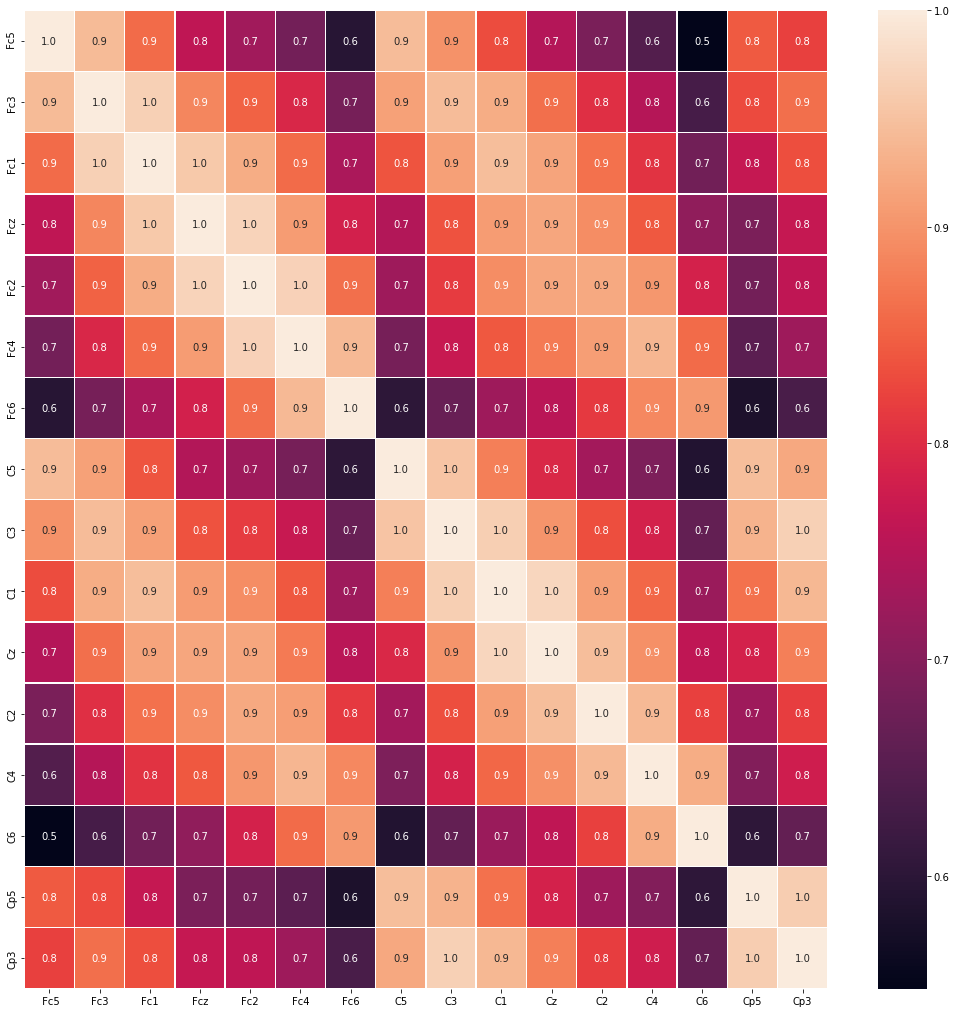

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.iloc[:,0:16].corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Normalizing the data

In [ ]:
d_n=data_y.iloc[:,0:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
#d_n
data_norm=pd.concat([d_n,df_y],axis=1)
data_norm

Fc5       Fc3       Fc1  ...        O2        Iz  label
0     0.437885  0.410790  0.348389  ...  0.423307  0.062585      1
1    -0.226974 -0.655703 -0.759777  ... -0.008024  0.128032      1
2    -0.646686 -1.093715 -1.285526  ... -0.228324  0.369322      1
3    -0.531773 -0.688454 -0.890580  ... -0.123128  0.405018      1
4    -0.140832 -0.078703 -0.185983  ...  0.137618  0.077889      1
...        ...       ...       ...  ...       ...       ...    ...
9901  0.007274  0.007682  0.012200  ...  0.003987 -0.008530      0
9902  0.005024  0.005621  0.009304  ...  0.002341 -0.007101      0
9903  0.003323  0.003996  0.006617  ...  0.001352 -0.004946      0
9904  0.002056  0.002744  0.004119  ...  0.000910 -0.002190      0
9905  0.001039  0.001683  0.001684  ...  0.000821  0.000957      0

[9906 rows x 65 columns]

Statistics/ summary of the normalized data

In [ ]:
d_n.describe()

Fc5           Fc3  ...            O2            Iz
count  9.906000e+03  9.906000e+03  ...  9.906000e+03  9.906000e+03
mean   1.875687e-17  9.808823e-19  ...  2.282034e-18 -1.209472e-17
std    1.000000e+00  1.000000e+00  ...  1.000000e+00  1.000000e+00
min   -3.839302e+00 -4.214504e+00  ... -4.655002e+00 -4.850347e+00
25%   -6.150615e-01 -6.165913e-01  ... -6.120207e-01 -5.800261e-01
50%   -1.087484e-02 -8.648682e-03  ... -1.289512e-02 -1.984207e-02
75%    5.792935e-01  5.878379e-01  ...  5.808252e-01  5.283658e-01
max    5.029021e+00  4.822159e+00  ...  5.212315e+00  5.527454e+00

[8 rows x 64 columns]

Balancing the classes

In [ ]:
class_count_0,class_count_1=data_norm['label'].value_counts()
new_d0=(data_norm.iloc[:,:][data_norm['label']==0]).sample(class_count_1)
new_d1=(data_norm.iloc[:,:][data_norm['label']==1]).sample(class_count_1)
new_data=pd.concat([new_d0,new_d1],axis=0,ignore_index=True)
new_data

Fc5       Fc3       Fc1  ...        O2        Iz  label
0    -2.003868 -2.121209 -1.979658  ... -0.591234 -0.284074      0
1     0.694860  0.478021  0.297812  ...  2.019847  1.267335      0
2     1.095788  1.324728  1.351242  ...  0.620343 -0.134431      0
3    -0.920919 -0.510941 -0.073155  ...  0.142864 -0.580721      0
4    -2.290041 -2.944190 -2.503557  ... -1.163391 -0.941000      0
...        ...       ...       ...  ...       ...       ...    ...
9165 -0.885713 -0.764170 -0.608306  ...  0.320519 -0.277604      1
9166 -0.112340 -0.186216 -0.127350  ... -0.347994 -0.324026      1
9167  0.726126  0.613397  0.620248  ...  1.021455  0.516360      1
9168 -0.927518 -1.028332 -1.363715  ... -0.828694 -0.494670      1
9169  0.424483  0.565181  0.780995  ...  0.302357  0.796210      1

[9170 rows x 65 columns]

In [ ]:
new_y=new_data['label']
new_y

0       0
1       0
2       0
3       0
4       0
       ..
9165    1
9166    1
9167    1
9168    1
9169    1
Name: label, Length: 9170, dtype: int64

Plots after normalizing and balancing the classes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


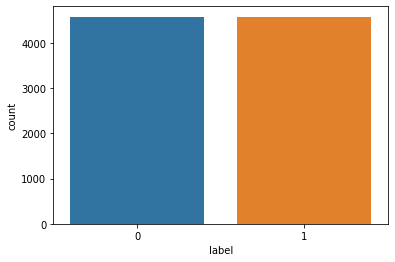

In [ ]:
sns.countplot(new_data['label'])

Visualizing the Balanced & Normalized Dataset

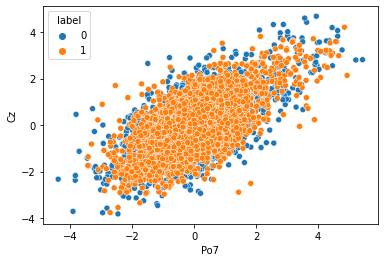

In [ ]:
#For the balanced dataset
sns.scatterplot(data=new_data, x="Po7",y="Cz",hue="label")

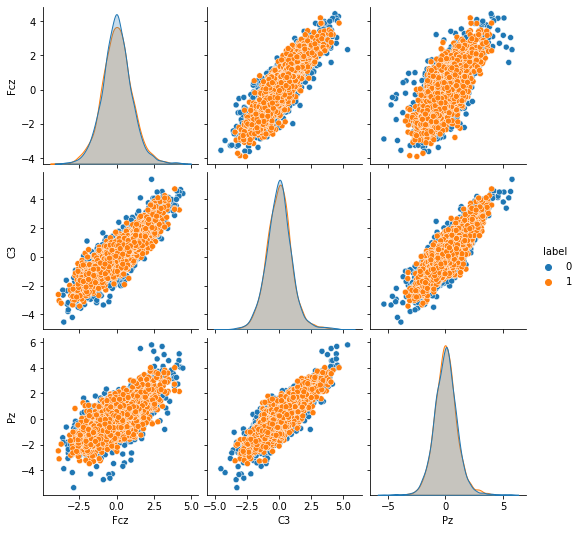

In [ ]:
sns.pairplot(new_data,x_vars=["Fcz","C3","Pz"],y_vars=["Fcz","C3","Pz"],hue="label")

Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(new_data.iloc[:,0:-1],new_y,test_size=0.2,random_state=21)

Next step is the feature extraction step.Since, it would be computationally very expensive to run on the raw data, we need to reduce the dimensionality and extract some informative features from the data.

We will be using different strategies for Feature Extraction + Classification#

1. Classification on Raw Data using all 64 Features. (Classification Model :KNN)

2. Using PCA for Dimensionality Reduction & Classification using KNN

3. Using Autoencoder for Dimensionality Reduction and extracting features from the data, then classifying using KNN, SVM and Random Forest Classifiers

1.Classification on Raw Data using all 64 Features using KNN.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score,f1_score
from sklearn.metrics import plot_confusion_matrix

In [ ]:
##Results of Classification:
print('KNN result: ')
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred,average='weighted'))
print('Precision: ',precision_score(y_test,y_pred,average='weighted'))
print('Recall: ',recall_score(y_test,y_pred,average='weighted'))


KNN result: 
Accuracy:  0.6106870229007634
f1_score:  0.6106480964688574
Precision:  0.6106222409030915
Recall:  0.6106870229007634


Text(0.5, 1.0, 'Confusion Matrix')

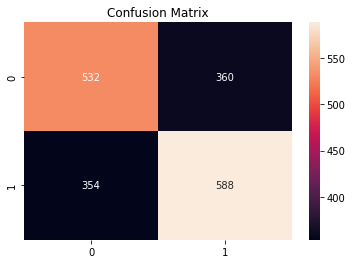

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
ax.set_title('Confusion Matrix')

Since, the data is very large, we need to do dimensionality reduction and extract some informative features.

Using PCA for Dimensionality Reduction 

In [ ]:
##Using PCA for reducing the dimensions to 2, in order to visulaize the clusters using KMeans.

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(2)
#Transform
df_pca=pca.fit_transform(new_data.iloc[:,0:-1])
df_pca.shape

(9170, 2)

In [ ]:
#KMeans

In [ ]:
##apply kmeans to the data
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
label_k=kmeans.fit_predict(df_pca)
print(label_k)

[0 1 1 ... 1 0 1]


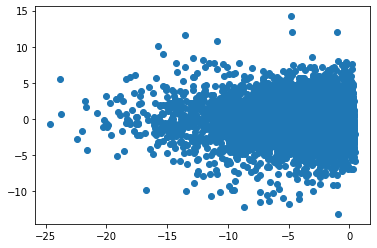

In [ ]:
##plotting cluster with label 0
filtered_label0 = df_pca[label_k == 0]
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

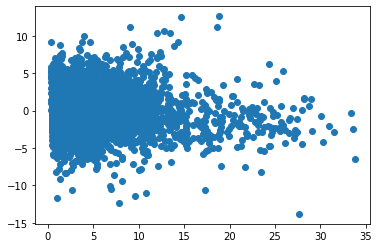

In [ ]:
##plotting cluster with label 1
filtered_label1 = df_pca[label_k == 1]
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1])
plt.show()

In [ ]:
filtered_label1 = df_pca[label_k == 1]
filtered_label1

array([[ 5.28669688, -3.72327687],
       [ 7.13004718,  0.75471964],
       [ 3.4137091 ,  0.18512271],
       ...,
       [ 7.00827656,  1.38380634],
       [ 3.44935005,  0.67459312],
       [ 3.75192484,  1.20722666]])

In [ ]:
##Visualizing the Clusters with Centroids

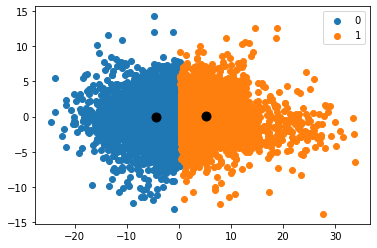

In [ ]:
u_labels = np.unique(label_k)
centroids = kmeans.cluster_centers_
#plotting the results:
 
for i in u_labels:
    plt.scatter(df_pca[label_k == i , 0] , df_pca[label_k == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:
#Plotting the reduced dimensionality data using PCA

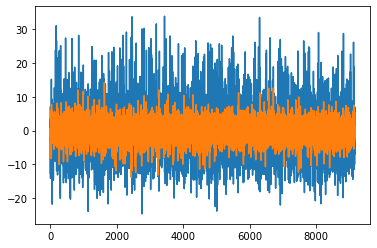

In [ ]:
plt.plot(df_pca)

Using PCA for Feature Reduction & Classifying taking 32 features from a set of 64 Features.

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(32)##32 dimensions
#Transform
df_pca2=pca.fit_transform(new_data.iloc[:,0:-1])
df_pca2.shape

(9170, 32)

Splitting the extracted features into train & test

In [ ]:
xx_train,xx_test,yy_train,yy_test=train_test_split(df_pca2,new_y,test_size=0.2,random_state=21)

KNN Classifier on Reduced Features by PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2) 
classifier.fit(xx_train, yy_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
yy_pred = classifier.predict(xx_test)

In [ ]:
##Results of Classification:
print('KNN result: ')
print('Accuracy: ',accuracy_score(yy_test,yy_pred))
print('f1_score: ',f1_score(yy_test,yy_pred,average='weighted'))
print('Precision: ',precision_score(yy_test,yy_pred,average='weighted'))
print('Recall: ',recall_score(yy_test,yy_pred,average='weighted'))


KNN result: 
Accuracy:  0.6074154852780806
f1_score:  0.6074369747441157
Precision:  0.6074642415357393
Recall:  0.6074154852780806


Text(0.5, 1.0, 'Confusion Matrix')

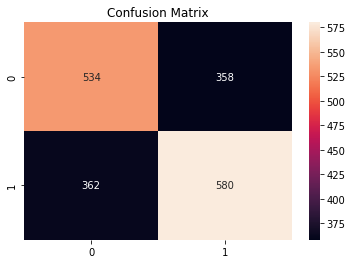

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(yy_test, yy_pred)
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
ax.set_title('Confusion Matrix')

3. Since, PCA has some shortcomings, will be using an Autoencoder for Dimensionality Reduction & Extracting informative Features. Then Classifying using KNN, SVM and Random Forest models.

Reducing the Dimensions to 32 using an Autoencoder.

In [ ]:
##Using autoencoder for feature extraction and reducing the dimensionality of the data
import keras
from keras import layers
from keras import regularizers
##size of our encoded representations
encoding_dim=32 ##reducing the dimensions
##nput
input_=keras.Input(shape=(64,))
##encoded representation
encoded=layers.Dense(encoding_dim,activation='elu',activity_regularizer=regularizers.l1(10e-5))(input_)
##decoded
decoded=layers.Dense(64,activation='elu')(encoded)
##model
autoencoder=keras.Model(input_,decoded)

In [ ]:
##separate encoder model
encoder=keras.Model(input_,encoded)

In [ ]:
##decoded model
encoded_input=keras.Input(shape=(encoding_dim,))
##the last layer of the autoencoder model
decoded_layer=autoencoder.layers[-1]
##the decoder model
decoder=keras.Model(encoded_input,decoded_layer(encoded_input))

In [ ]:
from tensorflow.keras import layers, losses

In [ ]:
autoencoder.compile(optimizer='adam',loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/200
29/29 [==============================] - 1s 21ms/step - loss: 0.9962 - val_loss: 0.6569
Epoch 2/200
29/29 [==============================] - 0s 4ms/step - loss: 0.5207 - val_loss: 0.4100
Epoch 3/200
29/29 [==============================] - 0s 3ms/step - loss: 0.3663 - val_loss: 0.3270
Epoch 4/200
29/29 [==============================] - 0s 3ms/step - loss: 0.3044 - val_loss: 0.2845
Epoch 5/200
29/29 [==============================] - 0s 4ms/step - loss: 0.2689 - val_loss: 0.2572
Epoch 6/200
29/29 [==============================] - 0s 4ms/step - loss: 0.2456 - val_loss: 0.2387
Epoch 7/200
29/29 [==============================] - 0s 4ms/step - loss: 0.2290 - val_loss: 0.2248
Epoch 8/200
29/29 [==============================] - 0s 3ms/step - loss: 0.2159 - val_loss: 0.2132
Epoch 9/200
29/29 [==============================] - 0s 3ms/step - loss: 0.2051 - val_loss: 0.2035
Epoch 10/200
29/29 [==============================] - 0s 3ms/step - loss: 0.1959 - val_loss: 0.1952
Epoch 11

Showing encoded 32 dimension plot of EEG data

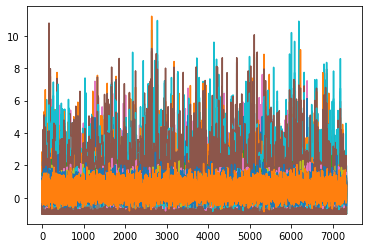

In [ ]:
encoded_t=encoder.predict(X_train)
plt.plot(encoded_t)

In [ ]:
encoder.predict(X_test)

array([[ 0.6893171 ,  1.4167817 ,  2.5997038 , ..., -0.09061378,
         0.3146752 ,  1.583991  ],
       [ 1.1694243 ,  0.7575677 , -0.13317353, ...,  0.86480105,
         0.83084106,  0.6216393 ],
       [ 0.19490655,  1.0943507 ,  1.3490489 , ...,  0.06951442,
         0.43945432,  1.0863469 ],
       ...,
       [ 0.7186412 ,  0.6038728 ,  1.4275082 , ..., -0.04209042,
         0.52046996,  0.88899875],
       [ 0.21146393,  0.5160327 ,  0.67548585, ...,  0.16315797,
         0.49904516,  0.71814406],
       [-0.00596201,  1.172464  , -0.03351325, ...,  0.3014944 ,
         1.4278738 ,  0.9005128 ]], dtype=float32)

In [ ]:
##plt.plot(decoder.predict(encoded_t))

In [ ]:
##
x_train=encoder.predict(X_train)
x_test=encoder.predict(X_test)

Using KNN on the 32 extracted Autoencoder Features

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predicted = classifier.predict(x_test)
##Results of Classification:
print('KNN result: ')
print('Accuracy: ',accuracy_score(y_test,y_predicted))
print('f1_score: ',f1_score(y_test,y_predicted,average='weighted'))
print('Precision: ',precision_score(y_test,y_predicted,average='weighted'))
print('Recall: ',recall_score(y_test,y_predicted,average='weighted'))



KNN result: 
Accuracy:  0.6690294438386042
f1_score:  0.6688446366484616
Precision:  0.6689087204092632
Recall:  0.6690294438386042


Text(0.5, 1.0, 'Confusion Matrix')

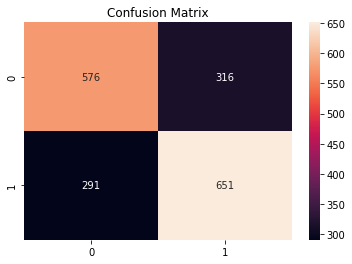

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
ax.set_title('Confusion Matrix')

Using SVM on the extracted 32 Autoencoder Features

In [ ]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='rbf',C=10, gamma=1) # Rbf Kernel
#Train the model using the training sets
clf.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
##Results of Classification:
print('SVM result: ')
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred,average='weighted'))
print('Precision: ',precision_score(y_test,y_pred,average='weighted'))
print('Recall: ',recall_score(y_test,y_pred,average='weighted'))


SVM result: 
Accuracy:  0.6908396946564885
f1_score:  0.6887067392002887
Precision:  0.7000154591799136
Recall:  0.6908396946564885


Text(0.5, 1.0, 'Confusion Matrix')

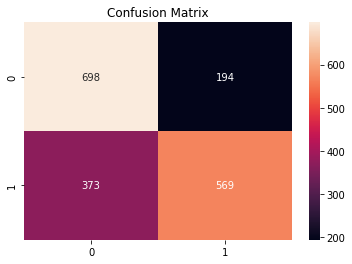

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
ax.set_title('Confusion Matrix')

Using Random Forest Classifier on the 32 Extracted Autoencoder Features

In [ ]:
##Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=300,max_features=32)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [ ]:
##Results of Classification:
print('Random Forest result: ')
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred,average='weighted'))
print('Precision: ',precision_score(y_test,y_pred,average='weighted'))
print('Recall: ',recall_score(y_test,y_pred,average='weighted'))

Random Forest result: 
Accuracy:  0.6575790621592148
f1_score:  0.6575448243451576
Precision:  0.6575246642888756
Recall:  0.6575790621592148


Text(0.5, 1.0, 'Confusion Matrix')

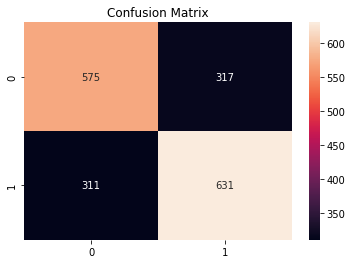

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
ax.set_title('Confusion Matrix')

Selecting 16 Features using an Autoencoder.

In [ ]:
##Using autoencoder for feature extraction and reducing the dimensionality of the data
import keras
from keras import layers
from keras import regularizers
##size of our encoded representations
encoding_dim=16 ##reducing the dimensions
##nput
input_=keras.Input(shape=(64,))
##encoded representation
encoded=layers.Dense(encoding_dim,activation='elu',activity_regularizer=regularizers.l1(10e-5))(input_)
##decoded
decoded=layers.Dense(64,activation='elu')(encoded)
##model
autoencoder=keras.Model(input_,decoded)

In [ ]:
##separate encoder model
encoder=keras.Model(input_,encoded)

In [ ]:
##decoded model
encoded_input=keras.Input(shape=(encoding_dim,))
##the last layer of the autoencoder model
decoded_layer=autoencoder.layers[-1]
##the decoder model
decoder=keras.Model(encoded_input,decoded_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam',loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/200
29/29 [==============================] - 1s 13ms/step - loss: 0.9934 - val_loss: 0.7862
Epoch 2/200
29/29 [==============================] - 0s 3ms/step - loss: 0.6561 - val_loss: 0.5245
Epoch 3/200
29/29 [==============================] - 0s 3ms/step - loss: 0.4665 - val_loss: 0.4085
Epoch 4/200
29/29 [==============================] - 0s 3ms/step - loss: 0.3892 - val_loss: 0.3603
Epoch 5/200
29/29 [==============================] - 0s 3ms/step - loss: 0.3482 - val_loss: 0.3273
Epoch 6/200
29/29 [==============================] - 0s 3ms/step - loss: 0.3167 - val_loss: 0.3000
Epoch 7/200
29/29 [==============================] - 0s 3ms/step - loss: 0.2910 - val_loss: 0.2791
Epoch 8/200
29/29 [==============================] - 0s 3ms/step - loss: 0.2716 - val_loss: 0.2634
Epoch 9/200
29/29 [==============================] - 0s 4ms/step - loss: 0.2569 - val_loss: 0.2512
Epoch 10/200
29/29 [==============================] - 0s 3ms/step - loss: 0.2453 - val_loss: 0.2415
Epoch 11

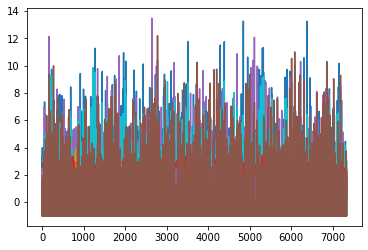

In [ ]:
encoded_t=encoder.predict(X_train)
plt.plot(encoded_t)

In [ ]:
encoder.predict(X_test)

array([[ 9.842077  , -0.73958296, -0.38712907, ...,  2.7551522 ,
        -0.5644616 , -0.99999994],
       [ 1.8487283 , -0.21725607,  1.9296257 , ...,  2.3702264 ,
         0.9806441 , -0.96069103],
       [-0.7900838 , -0.23292476,  0.95666075, ...,  0.6132427 ,
         1.606179  , -0.99475795],
       ...,
       [ 0.12141059, -0.4778719 ,  0.7180246 , ...,  0.61964285,
         1.2543443 , -0.97670704],
       [-0.10459137,  1.2813146 ,  0.43740153, ...,  0.99828696,
         1.1042265 , -0.96294194],
       [ 0.30881107,  1.6956384 ,  0.33245   , ...,  0.69149584,
         0.7469834 , -0.9973747 ]], dtype=float32)

In [ ]:
x_train=encoder.predict(X_train)
x_test=encoder.predict(X_test)

Using KNN on the 16 extracted Autoencoder Features

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predicted = classifier.predict(x_test)
##Results of Classification:
print('KNN result: ')
print('Accuracy: ',accuracy_score(y_test,y_predicted))
print('f1_score: ',f1_score(y_test,y_predicted,average='weighted'))
print('Precision: ',precision_score(y_test,y_predicted,average='weighted'))
print('Recall: ',recall_score(y_test,y_predicted,average='weighted'))



KNN result: 
Accuracy:  0.6035986913849509
f1_score:  0.603642200463331
Precision:  0.6037147727051472
Recall:  0.6035986913849509


Text(0.5, 1.0, 'Confusion Matrix')

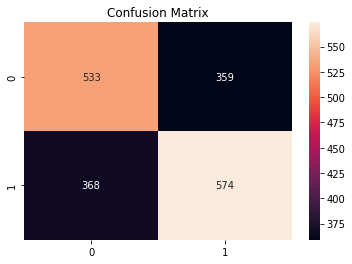

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
ax.set_title('Confusion Matrix')

Using SVM on the extracted 16 Autoencoder Features 

In [ ]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='rbf',C=10, gamma=1) # Linear Kernel
#Train the model using the training sets
clf.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
##Results of Classification:
print('SVM result: ')
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred,average='weighted'))
print('Precision: ',precision_score(y_test,y_pred,average='weighted'))
print('Recall: ',recall_score(y_test,y_pred,average='weighted'))


SVM result: 
Accuracy:  0.6194111232279171
f1_score:  0.6178754806002206
Precision:  0.6240634744336747
Recall:  0.6194111232279171


Text(0.5, 1.0, 'Confusion Matrix')

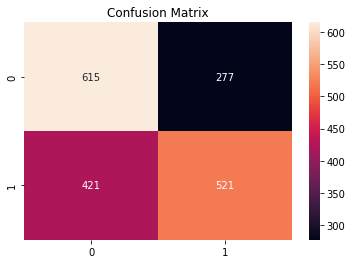

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
ax.set_title('Confusion Matrix')

Using Random Forest on the extracted 16 Autoencoder Features 

In [ ]:
##Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=300,max_features=16)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [ ]:
##Results of Classification:
print('Random Forest result: ')
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred,average='weighted'))
print('Precision: ',precision_score(y_test,y_pred,average='weighted'))
print('Recall: ',recall_score(y_test,y_pred,average='weighted'))

Random Forest result: 
Accuracy:  0.6025081788440567
f1_score:  0.6025248417141708
Precision:  0.6033333684335104
Recall:  0.6025081788440567


Text(0.5, 1.0, 'Confusion Matrix')

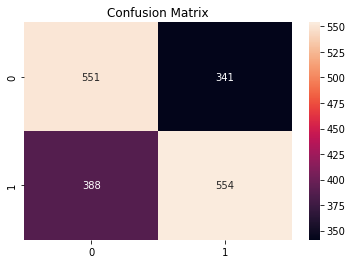

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
ax.set_title('Confusion Matrix')

Results for Subject 1

1.   Using KNN on raw data (64 Features): 61% Accuracy

2.   Using PCA (32 Features): 
KNN Model:   60% Accuracy.

3.   Using Autoencoder (32 Features)
   
   KNN: 66.9% Accuracy
   
   SVM: 69.08% Accuracy
   
   Random Forest: 65.75% Accuracy

4. Using Autoencoder (16 Features)
   
   KNN: 60.35% Accuracy
   
   SVM: 61.94% Accuracy
   
   Random Forest: 60.25% Accuracy

5.   SVM performed the best with an accuracy of 69.08% as SVM tends to work well with high dimensional space.


Conclusion:
The best accuracy we achieved in case of Subject 1 was 69.08% with SVM, however, this can be improved by using more sophisticated Deep Learning Models like CNN. Also, since,the data has too many features and is a complicated EEG time-series data, good feature extraction techniques can enhance the accuracy of the model.

In [ ]:
##Subject 2

Repeating all the above steps for the Second Subject from the EEG Dataset

In [ ]:
## reading the data file for Subject 2 performing the task of motor movement (opening & closing of left or right fist )
event_id=dict(left=0,right=1)
subject=2
runs=[3]
raw_fnames=eegbci.load_data(subject,runs)
raw=concatenate_raws([read_raw_edf(f,preload=True) for f in raw_fnames])

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...


In [ ]:
##showing the information of the downloaded file
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>

In [ ]:
##This EEG recording is between 0-80 Hz, but we need to classify the motor movements which according to many literatures lie in the  frequency range 7-30Hz.
#So, we need to bandpass filter the eeg data.
##bandpass filtering
raw_filter=raw.filter(7,30,fir_design='firwin',skip_by_annotation='edge')
events,_=events_from_annotations(raw_filter,event_id=dict(T0=0,T1=1,T2=2))
##here, T0 is the rest state in the eeg data, T1 = movement of the left fist while T2 = movement of the right fist
# eeg data information after bandpass filtering
raw_filter.info

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 sec)

Used Annotations descriptions: ['T0', 'T1', 'T2']


<Info | 7 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 7.0 Hz
 lowpass: 30.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


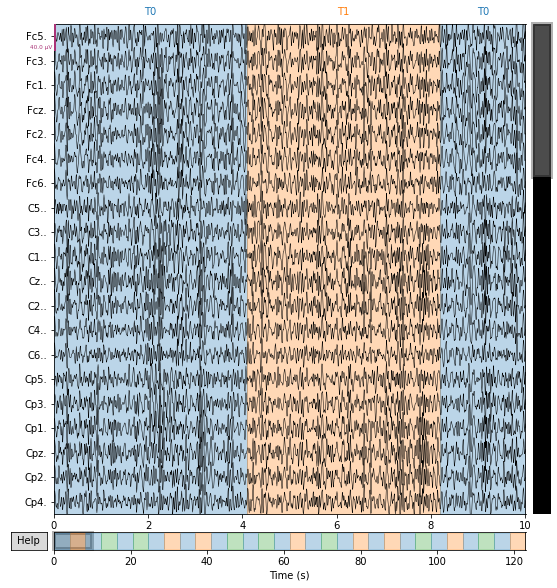

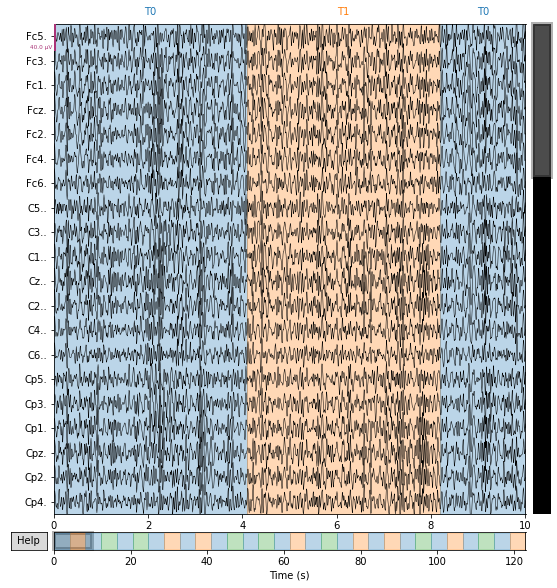

In [ ]:
##plotting the eeg data using the Matplotlib library
raw_filter.plot()

In [ ]:
##Now, converting our EEG data into Pandas Data Frame
header = ','.join(raw_filter.ch_names)
np.savetxt('S02.csv', raw_filter.get_data().T, delimiter=',', header=header)
df1=pd.read_csv('S02.csv')
df1


# Fc5.          Fc3.  ...          O2..          Iz..
0      2.329341e-21  3.599890e-21  ...  5.082198e-21  1.694066e-21
1     -9.105344e-06  7.472441e-06  ...  1.492756e-05  1.163334e-05
2     -9.831114e-06  1.611108e-05  ...  1.688289e-05  1.357866e-05
3     -1.946531e-06  2.242554e-05  ...  7.052285e-06  6.532929e-06
4      7.071767e-06  2.129326e-05  ... -1.381646e-06  1.898083e-07
...             ...           ...  ...           ...           ...
19675  2.381799e-05 -1.667088e-05  ... -7.817653e-06  1.983786e-06
19676  3.012397e-05 -1.565947e-05  ... -2.085289e-06  1.016023e-06
19677  2.393109e-05 -2.638994e-06  ... -1.588306e-06 -4.846443e-06
19678  1.225059e-05  5.015189e-06  ... -1.889584e-06 -6.261725e-06
19679  1.027640e-20 -2.042704e-21  ...  1.598864e-21 -1.418315e-21

[19680 rows x 64 columns]

In [ ]:
##Renaming the columns of the Data Frame; removing '#' and '.'.
df=df1.rename(columns=lambda x:x.strip('.'))
df=df.rename(columns=lambda x:x.strip('#'))
df

Fc5           Fc3  ...            O2            Iz
0      2.329341e-21  3.599890e-21  ...  5.082198e-21  1.694066e-21
1     -9.105344e-06  7.472441e-06  ...  1.492756e-05  1.163334e-05
2     -9.831114e-06  1.611108e-05  ...  1.688289e-05  1.357866e-05
3     -1.946531e-06  2.242554e-05  ...  7.052285e-06  6.532929e-06
4      7.071767e-06  2.129326e-05  ... -1.381646e-06  1.898083e-07
...             ...           ...  ...           ...           ...
19675  2.381799e-05 -1.667088e-05  ... -7.817653e-06  1.983786e-06
19676  3.012397e-05 -1.565947e-05  ... -2.085289e-06  1.016023e-06
19677  2.393109e-05 -2.638994e-06  ... -1.588306e-06 -4.846443e-06
19678  1.225059e-05  5.015189e-06  ... -1.889584e-06 -6.261725e-06
19679  1.027640e-20 -2.042704e-21  ...  1.598864e-21 -1.418315e-21

[19680 rows x 64 columns]

In [ ]:
##Reading the label file containg the 'left hand movement' and 'right hand movement' as '1' and '0' classes excluding the rest state.
data=pd.concat([df.iloc[656:1311], df.iloc[1968:2623],df.iloc[3280:3935],df.iloc[4592:5247],df.iloc[5904:6559],df.iloc[7216:7871],df.iloc[8528:9183],df.iloc[9840:10495],df.iloc[11152:11807],df.iloc[12464:13119],df.iloc[13776:14431],df.iloc[15088:15741],df.iloc[16400:17055],df.iloc[17712:18367],df.iloc[19024:19680]],ignore_index=True)
l=[]
for i in range(656,1311):
    l.append(0)
for i in range(1968,2623):
    l.append(1)
for i in range(3280,3935):
    l.append(1)
for i in range(4592,5247):
    l.append(0)
for i in range(5904,6559):
    l.append(0)
for i in range(7216,7871):
    l.append(1)
for i in range(8528,9183):
    l.append(1)
for i in range(9840,10495):
    l.append(0)
for i in range(11152,11807):
    l.append(1)
for i in range(12464,13119):
    l.append(0)
for i in range(13776,14431):
    l.append(0)
for i in range(15088,15741):
    l.append(1)
for i in range(16400,17055):
    l.append(0)
for i in range(17712,18367):
    l.append(1)
for i in range(19024,19680):
    l.append(0)
print(len(l))

l_y={'label':l}
df_y=pd.DataFrame(l_y)
df_y



9824


label
0         0
1         0
2         0
3         0
4         0
...     ...
9819      0
9820      0
9821      0
9822      0
9823      0

[9824 rows x 1 columns]

In [ ]:
##Concatenating our label data with the eeg data and removing the rest state which we are not classifying and thus our data dimensions will be 9906*65
data_y=pd.concat([data,df_y],axis=1)
data_y

Fc5           Fc3  ...            Iz  label
0    -1.120437e-05 -2.695533e-06  ... -4.046469e-06      0
1     4.201129e-06  6.462919e-06  ... -2.216812e-06      0
2     1.512254e-05  1.424166e-05  ...  1.367571e-06      0
3     1.593216e-05  1.657998e-05  ...  4.802444e-06      0
4     8.521378e-06  1.234033e-05  ...  4.947782e-06      0
...            ...           ...  ...           ...    ...
9819  2.381799e-05 -1.667088e-05  ...  1.983786e-06      0
9820  3.012397e-05 -1.565947e-05  ...  1.016023e-06      0
9821  2.393109e-05 -2.638994e-06  ... -4.846443e-06      0
9822  1.225059e-05  5.015189e-06  ... -6.261725e-06      0
9823  1.027640e-20 -2.042704e-21  ... -1.418315e-21      0

[9824 rows x 65 columns]

In [ ]:
##looking at the data types of the features: EEG channels
df.dtypes

 Fc5    float64
Fc3     float64
Fc1     float64
Fcz     float64
Fc2     float64
         ...   
Po8     float64
O1      float64
Oz      float64
O2      float64
Iz      float64
Length: 64, dtype: object

In [ ]:
##looking at the data types of the label
print(df_y.dtypes)
print(df_y)

label    int64
dtype: object
      label
0         0
1         0
2         0
3         0
4         0
...     ...
9819      0
9820      0
9821      0
9822      0
9823      0

[9824 rows x 1 columns]


In [ ]:
## checking for null values in the data
data_y.isnull().values.any()

False

Checking for NAN values in the data

In [ ]:
##checking for NA values in the data
data_y.isna().values.any()

False

Statistics/ Summary of the data

In [ ]:
data_y.iloc[:,0:-1].describe()

Fc5           Fc3  ...            O2            Iz
count  9.824000e+03  9.824000e+03  ...  9.824000e+03  9.824000e+03
mean   4.868828e-09 -4.126504e-10  ... -8.629928e-09 -1.609001e-08
std    1.427026e-05  1.409313e-05  ...  2.131387e-05  1.671701e-05
min   -1.101662e-04 -1.477688e-04  ... -9.805586e-05 -7.317684e-05
25%   -9.080997e-06 -8.574985e-06  ... -1.252263e-05 -1.007085e-05
50%    1.806785e-07  1.694221e-07  ... -1.985287e-07 -7.415595e-08
75%    8.957133e-06  8.474048e-06  ...  1.229961e-05  9.847540e-06
max    1.058544e-04  1.260389e-04  ...  9.572110e-05  6.527145e-05

[8 rows x 64 columns]

Checking if the data is balanced

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


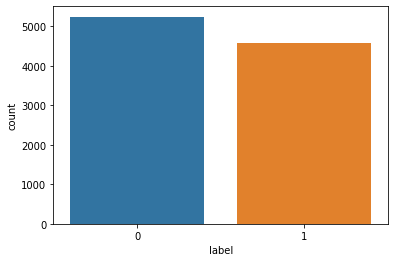

In [ ]:
sns.countplot(df_y['label'])

Counting the number of values in each class

In [ ]:
class_count0,class_count1=df_y['label'].value_counts()
print("Class 0:", class_count0,  "Class 1:",  class_count1)

Class 0: 5241 Class 1: 4583


Visualizing the data

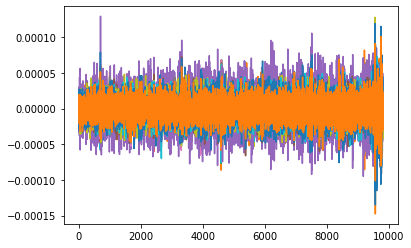

In [ ]:
plt.plot(data.iloc[:,0:32])

In [ ]:
##Pairplot

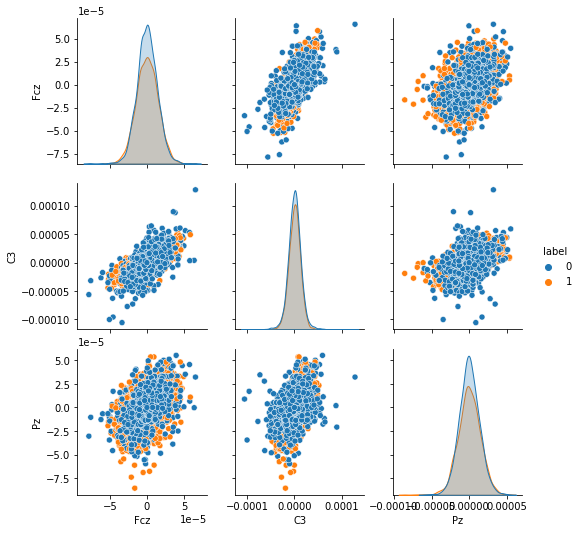

In [ ]:
sns.pairplot(data_y,x_vars=["Fcz","C3","Pz"],y_vars=["Fcz","C3","Pz"],hue="label")

Visualizing Correlation between features

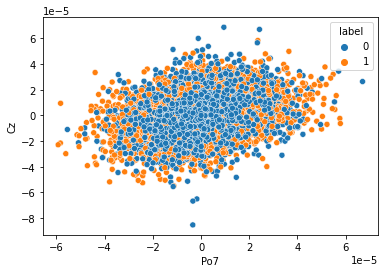

In [ ]:
##plotting for between features 'Fcz' & 'Cz'
sns.scatterplot(data=data_y, x="Po7",y="Cz",hue="label")

Correlation Heatmap

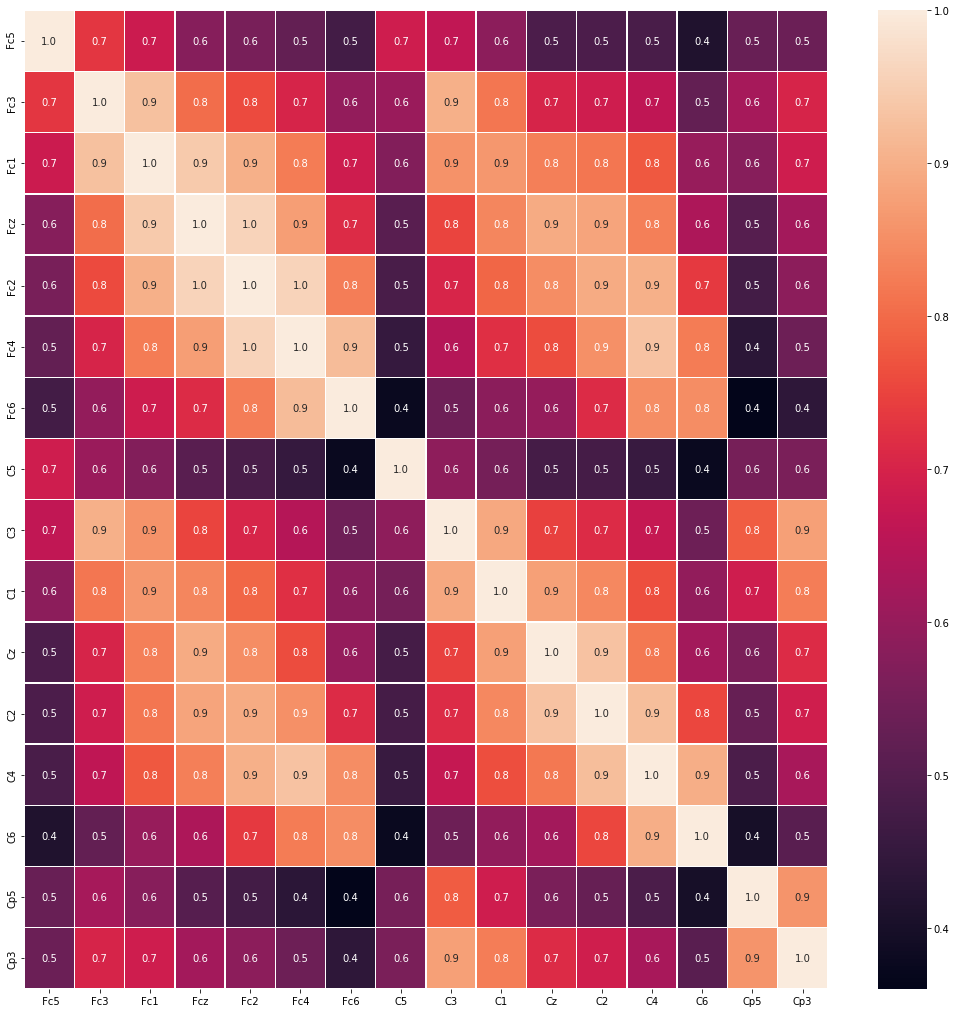

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.iloc[:,0:16].corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Normalizing the data

In [ ]:
d_n=data_y.iloc[:,0:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
#d_n
data_norm=pd.concat([d_n,df_y],axis=1)
data_norm

Fc5       Fc3       Fc1  ...        O2        Iz  label
0    -0.785496 -0.191236  0.041277  ...  0.145130 -0.241094      0
1     0.294056  0.458616  0.282739  ...  0.388421 -0.131646      0
2     1.059383  1.010568  0.623739  ...  0.473061  0.082770      0
3     1.116118  1.176487  0.970615  ...  0.338850  0.288241      0
4     0.596801  0.875657  1.071092  ...  0.007514  0.296935      0
...        ...       ...       ...  ...       ...       ...    ...
9819  1.668724 -1.182879 -0.515846  ... -0.366382  0.119631      0
9820  2.110621 -1.111113 -0.468051  ... -0.097432  0.061740      0
9821  1.676650 -0.187225 -0.041107  ... -0.074115 -0.288948      0
9822  0.858129  0.355890  0.191463  ... -0.088250 -0.373609      0
9823 -0.000341  0.000029  0.000196  ...  0.000405  0.000962      0

[9824 rows x 65 columns]

Statistics/ summary of the normalized data

In [ ]:
d_n.describe()

Fc5           Fc3  ...            O2            Iz
count  9.824000e+03  9.824000e+03  ...  9.824000e+03  9.824000e+03
mean   1.618801e-17 -6.360507e-18  ... -9.284309e-18  1.774220e-17
std    1.000000e+00  1.000000e+00  ...  1.000000e+00  1.000000e+00
min   -7.720329e+00 -1.048513e+01  ... -4.600160e+00 -4.376425e+00
25%   -6.366996e-01 -6.084220e-01  ... -5.871293e-01 -6.014684e-01
50%    1.232001e-02  1.205089e-02  ... -8.909632e-03 -3.473464e-03
75%    6.273373e-01  6.013184e-01  ...  5.774753e-01  5.900355e-01
max    7.417494e+00  8.943311e+00  ...  4.491428e+00  3.905455e+00

[8 rows x 64 columns]

Balancing the classes

In [ ]:
class_count_0,class_count_1=data_norm['label'].value_counts()
new_d0=(data_norm.iloc[:,:][data_norm['label']==0]).sample(class_count_1)
new_d1=(data_norm.iloc[:,:][data_norm['label']==1]).sample(class_count_1)
new_data=pd.concat([new_d0,new_d1],axis=0,ignore_index=True)
new_data

Fc5       Fc3       Fc1  ...        O2        Iz  label
0    -0.152308  0.104102  0.118833  ... -0.135993 -0.617091      0
1     0.655106  0.725314  0.684352  ...  0.006877  0.034147      0
2    -0.452783 -0.179131  0.085356  ...  1.398689  0.614613      0
3    -0.787123 -1.121327 -1.179855  ... -0.554388 -0.580371      0
4     0.042578  0.010091 -0.121133  ... -0.126784 -0.386798      0
...        ...       ...       ...  ...       ...       ...    ...
9161 -0.470662 -0.101337 -0.135729  ...  1.521684  1.568092      1
9162 -0.327911 -0.110586 -0.087189  ...  0.714306  0.212314      1
9163  0.533674  1.093981  1.739813  ...  0.003013 -0.206368      1
9164 -0.461246  0.439091  0.609157  ...  0.008853 -0.295720      1
9165  1.025429  0.753467  0.089507  ... -0.892769 -0.354182      1

[9166 rows x 65 columns]

In [ ]:
new_y=new_data['label']
new_y

0       0
1       0
2       0
3       0
4       0
       ..
9161    1
9162    1
9163    1
9164    1
9165    1
Name: label, Length: 9166, dtype: int64

Plots after normalizing and balancing the classes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


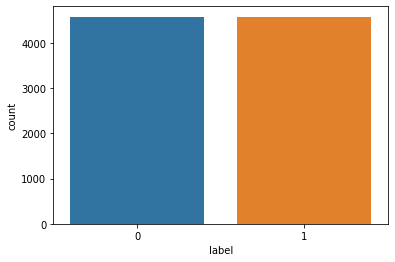

In [ ]:
sns.countplot(new_data['label'])

Visualizing the Balanced & Normalized Dataset

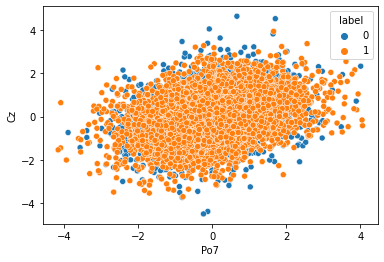

In [ ]:
#For the balanced dataset
sns.scatterplot(data=new_data, x="Po7",y="Cz",hue="label")

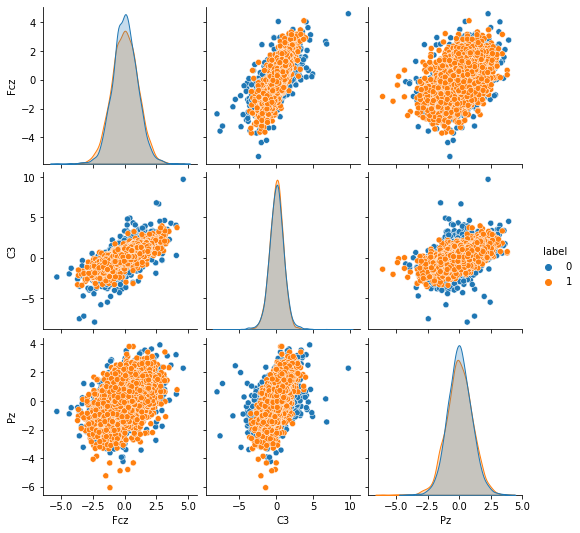

In [ ]:
sns.pairplot(new_data,x_vars=["Fcz","C3","Pz"],y_vars=["Fcz","C3","Pz"],hue="label")

Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(new_data.iloc[:,0:-1],new_y,test_size=0.2,random_state=21)

Next step is the feature extraction step.Since, it would be computationally very expensive to run on the raw data, we need to reduce the dimensionality and extract some informative features from the data.

We will be using different strategies for Feature Extraction + Classification#

1.Classification on Raw Data using all 64 Features. (Classification Model :KNN)

2.Using PCA for Dimensionality Reduction & Classification using KNN

3.Using Autoencoder for Dimensionality Reduction and extracting features from the data, then classifying using KNN, SVM and Random Forest Classifiers

1.Classification on Raw Data using all 64 Features using KNN.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score,f1_score
from sklearn.metrics import plot_confusion_matrix

In [ ]:
##Results of Classification:
print('KNN result: ')
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred,average='weighted'))
print('Precision: ',precision_score(y_test,y_pred,average='weighted'))
print('Recall: ',recall_score(y_test,y_pred,average='weighted'))


KNN result: 
Accuracy:  0.6613958560523446
f1_score:  0.6614825749719769
Precision:  0.6617426813203121
Recall:  0.6613958560523446


Text(0.5, 1.0, 'Confusion Matrix')

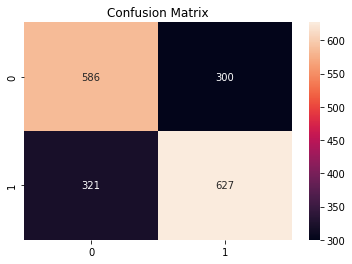

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
ax.set_title('Confusion Matrix')

Since, the data is very large, we need to do dimensionality reduction and extract some informative features.

Using PCA for Dimensionality Reduction

In [ ]:
##Using PCA for reducing the dimensions to 2, in order to visulaize the clusters using KMeans.

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(2)
#Transform
df_pca=pca.fit_transform(new_data.iloc[:,0:-1])
df_pca.shape

(9166, 2)

In [ ]:
#KMeans

#KMeans

In [ ]:
##apply kmeans to the data
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
label_k=kmeans.fit_predict(df_pca)
print(label_k)

[1 0 0 ... 0 0 0]


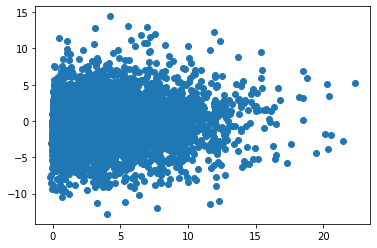

In [ ]:
##plotting cluster with label 0
filtered_label0 = df_pca[label_k == 0]
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

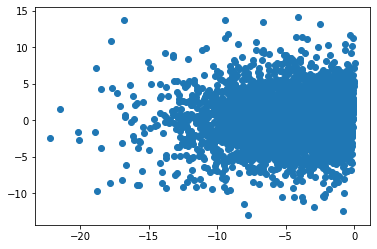

In [ ]:
##plotting cluster with label 1
filtered_label1 = df_pca[label_k == 1]
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1])
plt.show()

In [ ]:
filtered_label1 = df_pca[label_k == 1]
filtered_label1

array([[-0.08030649,  2.10776303],
       [-6.02799385, -0.57232818],
       [-4.08628026,  0.05160052],
       ...,
       [-3.57323959, -0.10216968],
       [-1.96578655,  1.07501199],
       [-0.86262209, -1.47185159]])

In [ ]:
##Visualizing the Clusters with Centroids

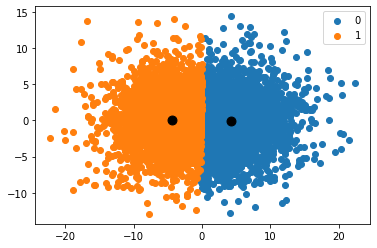

In [ ]:
u_labels = np.unique(label_k)
centroids = kmeans.cluster_centers_
#plotting the results:
 
for i in u_labels:
    plt.scatter(df_pca[label_k == i , 0] , df_pca[label_k == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:
#Plotting the reduced dimensionality data using PCA

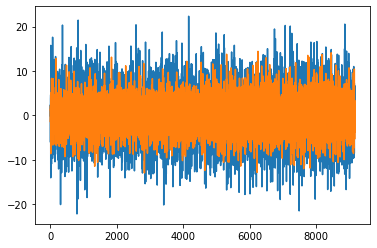

In [ ]:
plt.plot(df_pca)

Using PCA for Dimensionality Reduction & CLassifying taking 32 features from a set of 64 Features.

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(32)##32 dimensions
#Transform
df_pca2=pca.fit_transform(new_data.iloc[:,0:-1])
df_pca2.shape

(9166, 32)

Splitting the extracted features into train & test

In [ ]:
xx_train,xx_test,yy_train,yy_test=train_test_split(df_pca2,new_y,test_size=0.2,random_state=21)

KNN Classifier on Reduced Features (32) by PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2) 
classifier.fit(xx_train, yy_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
yy_pred = classifier.predict(xx_test)

In [ ]:
##Results of Classification:
print('KNN result: ')
print('Accuracy: ',accuracy_score(yy_test,yy_pred))
print('f1_score: ',f1_score(yy_test,yy_pred,average='weighted'))
print('Precision: ',precision_score(yy_test,yy_pred,average='weighted'))
print('Recall: ',recall_score(yy_test,yy_pred,average='weighted'))


KNN result: 
Accuracy:  0.6494002181025081
f1_score:  0.6494800058043475
Precision:  0.6496713548291035
Recall:  0.6494002181025081


Text(0.5, 1.0, 'Confusion Matrix')

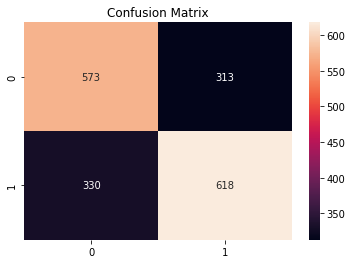

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(yy_test, yy_pred)
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
ax.set_title('Confusion Matrix')

3. Since, PCA has some shortcomings, using an Autoencoder for Dimensionality Reduction & Extracting informative Features.Then Classifying using KNN, SVM and Random Forest models.

Reducing the Dimensions to 32 using an Autoencoder.

In [ ]:
##Using autoencoder for feature extraction and reducing the dimensionality of the data
import keras
from keras import layers
from keras import regularizers
##size of our encoded representations
encoding_dim=32 ##reducing the dimensions
##nput
input_=keras.Input(shape=(64,))
##encoded representation
encoded=layers.Dense(encoding_dim,activation='elu',activity_regularizer=regularizers.l1(10e-5))(input_)
##decoded
decoded=layers.Dense(64,activation='elu')(encoded)
##model
autoencoder=keras.Model(input_,decoded)

In [ ]:
##separate encoder model
encoder=keras.Model(input_,encoded)

In [ ]:
##decoded model
encoded_input=keras.Input(shape=(encoding_dim,))
##the last layer of the autoencoder model
decoded_layer=autoencoder.layers[-1]
##the decoder model
decoder=keras.Model(encoded_input,decoded_layer(encoded_input))

In [ ]:
from tensorflow.keras import layers, losses

In [ ]:
autoencoder.compile(optimizer='adam',loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/200
29/29 [==============================] - 1s 13ms/step - loss: 1.0810 - val_loss: 0.7762
Epoch 2/200
29/29 [==============================] - 0s 3ms/step - loss: 0.6225 - val_loss: 0.5142
Epoch 3/200
29/29 [==============================] - 0s 3ms/step - loss: 0.4593 - val_loss: 0.4256
Epoch 4/200
29/29 [==============================] - 0s 3ms/step - loss: 0.3943 - val_loss: 0.3800
Epoch 5/200
29/29 [==============================] - 0s 3ms/step - loss: 0.3560 - val_loss: 0.3492
Epoch 6/200
29/29 [==============================] - 0s 3ms/step - loss: 0.3281 - val_loss: 0.3254
Epoch 7/200
29/29 [==============================] - 0s 4ms/step - loss: 0.3060 - val_loss: 0.3061
Epoch 8/200
29/29 [==============================] - 0s 3ms/step - loss: 0.2879 - val_loss: 0.2901
Epoch 9/200
29/29 [==============================] - 0s 4ms/step - loss: 0.2729 - val_loss: 0.2769
Epoch 10/200
29/29 [==============================] - 0s 3ms/step - loss: 0.2604 - val_loss: 0.2658
Epoch 11

Showing encoded 32 dimensions plot of EEG data.

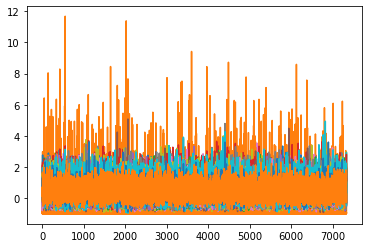

In [ ]:
encoded_t=encoder.predict(X_train)
plt.plot(encoded_t)

In [ ]:
encoder.predict(X_test)

array([[ 0.01982003, -0.9774251 ,  0.84881324, ...,  0.12619764,
         0.6638182 ,  0.8065697 ],
       [-0.03411245, -0.998706  ,  0.16851729, ...,  2.1295915 ,
         0.8943716 ,  0.2911431 ],
       [ 0.4663728 , -0.9778449 ,  1.0016456 , ...,  0.60396117,
         0.20276079,  0.86328566],
       ...,
       [ 0.49790418, -0.99201906,  0.18972337, ...,  1.2548468 ,
         1.0859497 ,  0.6587417 ],
       [ 1.1756923 , -0.8495902 ,  1.133182  , ...,  0.62578607,
         0.68470716,  0.32548705],
       [ 0.4668209 , -0.9954472 , -0.45649815, ...,  1.3720546 ,
         0.7564964 ,  0.03754506]], dtype=float32)

In [ ]:
##plt.plot(decoder.predict(encoded_t))

In [ ]:
##
x_train=encoder.predict(X_train)
x_test=encoder.predict(X_test)

Using KNN on the 32 extracted Autoencoder Features

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predicted = classifier.predict(x_test)
##Results of Classification:
print('KNN result: ')
print('Accuracy: ',accuracy_score(y_test,y_predicted))
print('f1_score: ',f1_score(y_test,y_predicted,average='weighted'))
print('Precision: ',precision_score(y_test,y_predicted,average='weighted'))
print('Recall: ',recall_score(y_test,y_predicted,average='weighted'))


KNN result: 
Accuracy:  0.7333696837513631
f1_score:  0.7334256060863542
Precision:  0.7335796342004886
Recall:  0.7333696837513631


Text(0.5, 1.0, 'Confusion Matrix')

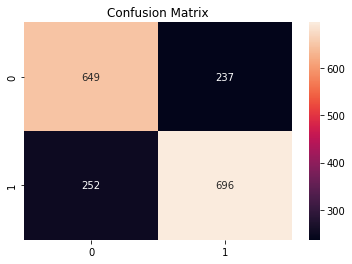

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
ax.set_title('Confusion Matrix')

Using SVM on the extracted 32 Autoencoder Features

In [ ]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='rbf',C=10, gamma=1) # Linear Kernel
#Train the model using the training sets
clf.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
##Results of Classification:
print('SVM result: ')
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred,average='weighted'))
print('Precision: ',precision_score(y_test,y_pred,average='weighted'))
print('Recall: ',recall_score(y_test,y_pred,average='weighted'))


SVM result: 
Accuracy:  0.7497273718647764
f1_score:  0.7489900945220344
Precision:  0.7506482911178992
Recall:  0.7497273718647764


Text(0.5, 1.0, 'Confusion Matrix')

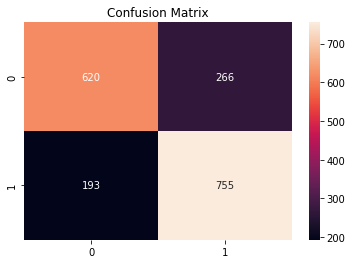

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
ax.set_title('Confusion Matrix')

Using Random Forest Classifier on the 32 Extracted Autoencoder Features


In [ ]:
##Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=200,max_features=32)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [ ]:
##Results of Classification:
print('Random Forest result: ')
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred,average='weighted'))
print('Precision: ',precision_score(y_test,y_pred,average='weighted'))
print('Recall: ',recall_score(y_test,y_pred,average='weighted'))

Random Forest result: 
Accuracy:  0.6472191930207197
f1_score:  0.6472125853717174
Precision:  0.6487352627380313
Recall:  0.6472191930207197


Text(0.5, 1.0, 'Confusion Matrix')

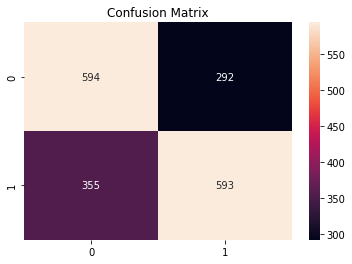

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
ax.set_title('Confusion Matrix')

Classification using 16 Autoencoder Extracted Features 

In [ ]:
##Using autoencoder for feature extraction and reducing the dimensionality of the data
import keras
from keras import layers
from keras import regularizers
##size of our encoded representations
encoding_dim=16 ##reducing the dimensions
##nput
input_=keras.Input(shape=(64,))
##encoded representation
encoded=layers.Dense(encoding_dim,activation='elu',activity_regularizer=regularizers.l1(10e-5))(input_)
##decoded
decoded=layers.Dense(64,activation='elu')(encoded)
##model
autoencoder=keras.Model(input_,decoded)

In [ ]:
##separate encoder model
encoder=keras.Model(input_,encoded)

In [ ]:
##decoded model
encoded_input=keras.Input(shape=(encoding_dim,))
##the last layer of the autoencoder model
decoded_layer=autoencoder.layers[-1]
##the decoder model
decoder=keras.Model(encoded_input,decoded_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam',loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/200
29/29 [==============================] - 1s 13ms/step - loss: 1.0548 - val_loss: 0.8706
Epoch 2/200
29/29 [==============================] - 0s 3ms/step - loss: 0.7608 - val_loss: 0.6633
Epoch 3/200
29/29 [==============================] - 0s 3ms/step - loss: 0.5974 - val_loss: 0.5451
Epoch 4/200
29/29 [==============================] - 0s 3ms/step - loss: 0.5046 - val_loss: 0.4766
Epoch 5/200
29/29 [==============================] - 0s 3ms/step - loss: 0.4467 - val_loss: 0.4300
Epoch 6/200
29/29 [==============================] - 0s 3ms/step - loss: 0.4055 - val_loss: 0.3966
Epoch 7/200
29/29 [==============================] - 0s 3ms/step - loss: 0.3763 - val_loss: 0.3729
Epoch 8/200
29/29 [==============================] - 0s 4ms/step - loss: 0.3556 - val_loss: 0.3556
Epoch 9/200
29/29 [==============================] - 0s 3ms/step - loss: 0.3402 - val_loss: 0.3423
Epoch 10/200
29/29 [==============================] - 0s 3ms/step - loss: 0.3280 - val_loss: 0.3313
Epoch 11

Plot showing 16 encoded features of EEG data

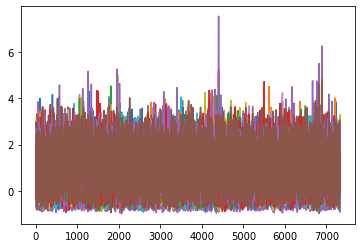

In [ ]:
encoded_t=encoder.predict(X_train)
plt.plot(encoded_t)

In [ ]:
encoder.predict(X_test)

array([[ 0.67266965,  0.8350733 ,  0.35327113, ...,  0.71865237,
         1.2859585 ,  2.3168397 ],
       [ 0.8934089 ,  0.77223873,  0.34026992, ...,  1.1589677 ,
         1.7498498 ,  1.3768811 ],
       [ 0.19338125,  1.0676423 ,  1.1236662 , ...,  1.602462  ,
         1.3822491 ,  1.6508675 ],
       ...,
       [ 0.62030023, -0.07356417,  0.05344182, ...,  0.98759687,
         1.638907  ,  1.1595856 ],
       [ 0.3983629 ,  1.5961647 ,  0.7158853 , ...,  1.1259128 ,
         1.4944011 ,  1.5850321 ],
       [ 1.013129  ,  0.6392735 ,  0.87366045, ..., -0.09915137,
         1.1493421 , -0.14691764]], dtype=float32)

In [ ]:
##
x_train=encoder.predict(X_train)
x_test=encoder.predict(X_test)

Using KNN on the 16 extracted Autoencoder Features

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predicted = classifier.predict(x_test)
##Results of Classification:
print('KNN result: ')
print('Accuracy: ',accuracy_score(y_test,y_predicted))
print('f1_score: ',f1_score(y_test,y_predicted,average='weighted'))
print('Precision: ',precision_score(y_test,y_predicted,average='weighted'))
print('Recall: ',recall_score(y_test,y_predicted,average='weighted'))



KNN result: 
Accuracy:  0.6319520174482006
f1_score:  0.6320532518725348
Precision:  0.6326689005988507
Recall:  0.6319520174482006


Text(0.5, 1.0, 'Confusion Matrix')

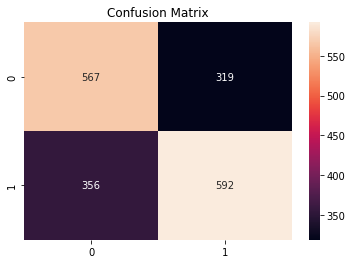

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
ax.set_title('Confusion Matrix')

Using SVM on the extracted 16 Autoencoder Features

In [ ]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='rbf',C=10, gamma=1) # Linear Kernel
#Train the model using the training sets
clf.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
##Results of Classification:
print('SVM result: ')
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred,average='weighted'))
print('Precision: ',precision_score(y_test,y_pred,average='weighted'))
print('Recall: ',recall_score(y_test,y_pred,average='weighted'))


SVM result: 
Accuracy:  0.6575790621592148
f1_score:  0.656505269989812
Precision:  0.6577037642877337
Recall:  0.6575790621592148


Text(0.5, 1.0, 'Confusion Matrix')

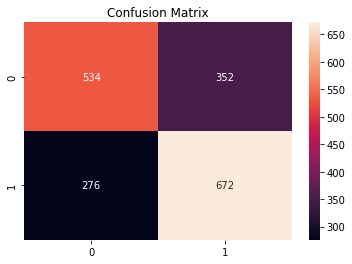

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
ax.set_title('Confusion Matrix')

Using Random Forest Classifier on the 16 Extracted Autoencoder Features


In [ ]:
##Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=300,max_features=16)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [ ]:
##Results of Classification:
print('Random Forest result: ')
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred,average='weighted'))
print('Precision: ',precision_score(y_test,y_pred,average='weighted'))
print('Recall: ',recall_score(y_test,y_pred,average='weighted'))

Random Forest result: 
Accuracy:  0.6025081788440567
f1_score:  0.6026141994509614
Precision:  0.6032651527111508
Recall:  0.6025081788440567


Text(0.5, 1.0, 'Confusion Matrix')

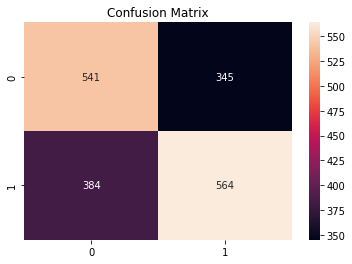

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
ax.set_title('Confusion Matrix')

Results for Subject 2#

Subject 2's results were better in comparison to Subject 1.

1.Using KNN on raw data (64 Features): 
66.13% Accuracy

2.Using PCA (32 Features): KNN Model: 
64.94% Accuracy.

3.Using Autoencoder (32 Features) 

KNN: 73.33% Accuracy 

SVM: 74.97% Accuracy 

Random Forest: 64.72% Accuracy

4.Using Autoencoder (16 Features) 

KNN: 63.19% Accuracy 

SVM: 65.75% Accuracy 

Random Forest: 60.25% Accuracy

5.SVM performed the best with an accuracy of 74.97% with 32 features taken as SVM tends to work well with high dimensional space.


Conclusion: The best accuracy we achieved in case of Subject 2 was 74.97% with SVM and was better than what we got for subject 1 as the results are dependent on the subject's individual EEG recording data. However, this can be improved by using more sophisticated Deep Learning Models like CNN. Also, since,the data has too many features, good feature extraction techniques can enhance the accuracy of the model.